# Introduction:
- Usually, the 40% of emails received by a people are SPAM. Several email systems contain heuristics for detecting this type of emails. Hence, in this course, you should create a model able for predicting spam emails.
- You can download a training dataset with 4,136 objects, which contain the text of emails as well as a label for each email; a value of zero (0) corresponds to human and one (1) to spam.

Importing the libraries

In [48]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import string
import seaborn as sns
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [26]:
dataset=pd.read_csv("spam.csv")

In [27]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [28]:
dataset.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [29]:
dataset.shape

(5572, 5)

In [30]:
dataset.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [31]:
dataset = dataset.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
dataset = dataset.rename(columns={"v1":"class", "v2":"text"})
dataset.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [33]:
dataset['length'] = dataset['text'].apply(len)
dataset.head()

,class,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<AxesSubplot:xlabel='class', ylabel='count'>

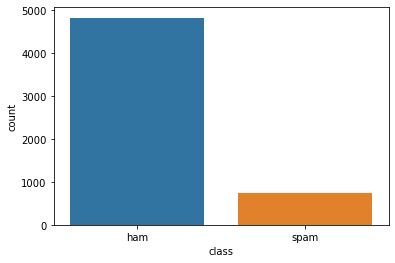

In [49]:
sns.countplot(x="class",data=dataset)

In [34]:
def pre_process(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    words = ""
    for i in text:
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    return words

In [43]:
textFeatures = dataset['text'].copy()
textFeatures = textFeatures.apply(pre_process)
vectorizer = TfidfVectorizer("english")
features = vectorizer.fit_transform(textFeatures)
x_train, x_test, y_train, y_test = train_test_split(features, dataset['class'], test_size=0.3, random_state=111)

In [44]:
svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(x_train, y_train)
prediction = svc.predict(x_test)
accuracy_score(y_test,prediction)

0.9778708133971292

In [46]:
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(x_train, y_train)
prediction_on_training_data =rfc.predict(x_train)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)
print('Accuracy on training data : ', accuracy_on_training_data *100)

Accuracy on training data :  100.0


In [47]:
knn_cv = KNeighborsClassifier(n_neighbors=3)
knn_cv.fit(x_train, y_train)
prediction_on_training_data = knn_cv.predict(x_train)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)
print('Accuracy on training data : ', accuracy_on_training_data *100)

Accuracy on training data :  93.84615384615384


# Conclusion:
Hence, the accuracy of random forest is more, this model is used to build the model.